# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [1]:
import pandas as pd

# importando os arquivos
servicos_df = pd.read_excel(r'BaseServiçosPrestados.xlsx')
clientes_df = pd.read_csv(r'CadastroClientes.csv', sep=';', decimal=',')
funcionarios_df = pd.read_csv(r'CadastroFuncionarios.csv', sep=';', decimal=',')

display(servicos_df.head())
display(clientes_df.head())
display(funcionarios_df.head())

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo


In [2]:
# Valor total da folha salarial
funcionarios_df['Gasto Salarial'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios']
gasto_salarial_total = funcionarios_df['Gasto Salarial'].sum()
print('O gasto total em salarios de funcionários foi de R$ {:,.2f}'.format(gasto_salarial_total))

O gasto total em salarios de funcionários foi de R$ 2,614,343.30


In [3]:
# Faturamento total da empresa
faturamento_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']])
faturamento_df['Faturamento'] = faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal']
faturamento_total = faturamento_df['Faturamento'].sum()
print('O faturamento total foi de R$ {:,.2f}'.format(faturamento_total))
display(faturamento_df)

O faturamento total foi de R$ 5,519,160.00


,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Faturamento
0,1,14,540,7560
1,2,12,1260,15120
2,4,14,2520,35280
3,5,8,3510,28080
4,6,8,2340,18720
...,...,...,...,...
232,315,4,1575,6300
233,316,8,3690,29520
234,317,6,2385,14310
235,319,14,4185,58590


In [4]:
# % de funcionarios que ja fecharam algum contrato
qtd_funcionarios = len(funcionarios_df['ID Funcionário'])
qtd_funcionarios_fecharam = len(servicos_df['ID Funcionário'].unique())
percent_funcionarios_fecharam = qtd_funcionarios_fecharam / qtd_funcionarios
print('{:.1%} dos funcionarios fecharam contratos.'.format(percent_funcionarios_fecharam))

86.8% dos funcionarios fecharam contratos.


Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64

<Axes: xlabel='Area'>

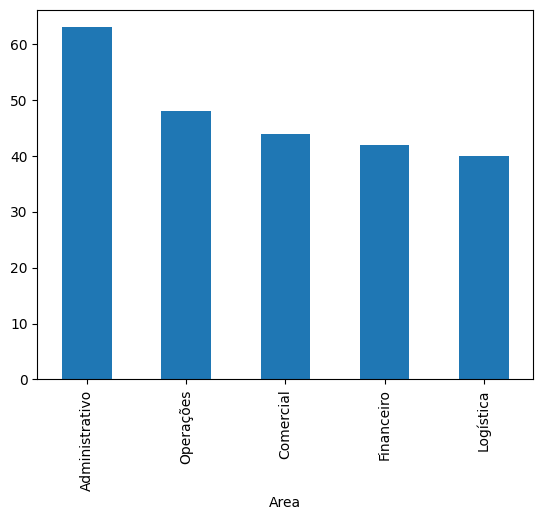

In [5]:
# Quantidade de contratos que cada area ja fechou
servicos_area_df = servicos_df[['ID Funcionário', 'Codigo do Servico']].merge(funcionarios_df[['ID Funcionário', 'Area']])
qtd_contratos_area = servicos_area_df['Area'].value_counts()
display(qtd_contratos_area)
qtd_contratos_area.plot(kind='bar')

Area
Administrativo    26
Comercial         26
Financeiro        18
Logística         21
Operações         23
Name: ID Funcionário, dtype: int64


<Axes: xlabel='Area'>

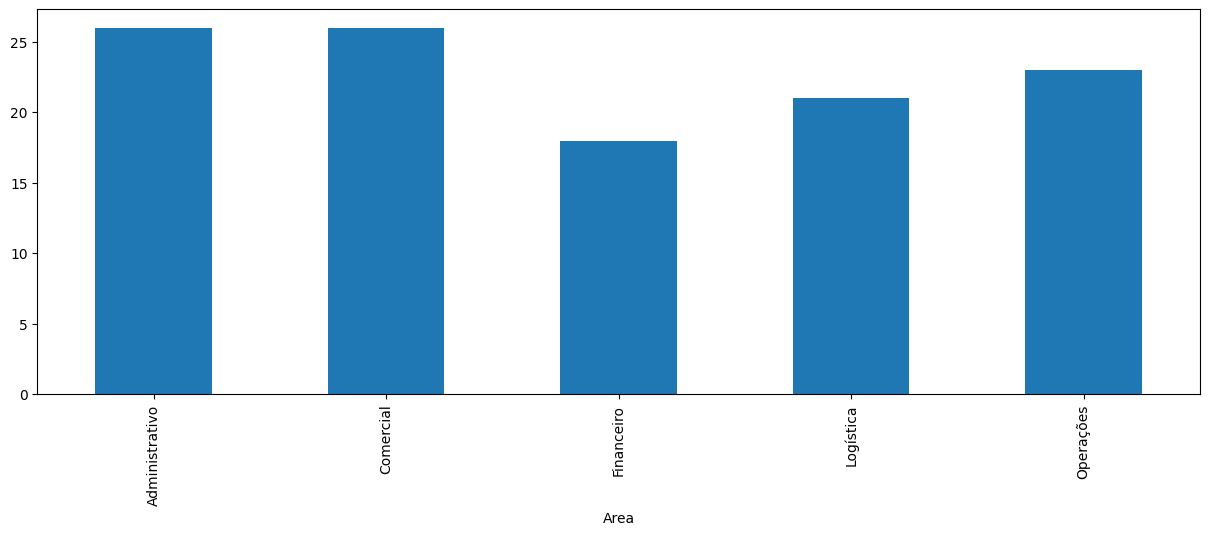

In [6]:
# Total de funcionários por area
funcionario_area = funcionarios_df.groupby('Area').count()
funcionario_area = funcionario_area['ID Funcionário']
print(funcionario_area)
funcionario_area.plot(figsize=(15, 5), kind='bar')

In [7]:
# Faturamento médio mensal
fat_medio_mensal = faturamento_df['Valor Contrato Mensal'].mean()
print('O faturamento médio mensal é de R$ {:,.2f}'.format(fat_medio_mensal))

O faturamento médio mensal é de R$ 2,438.35
